In [1]:
import numpy as np
from scipy import fftpack
from scipy import optimize
from scipy import stats
from scipy import ndimage
from scipy import misc
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

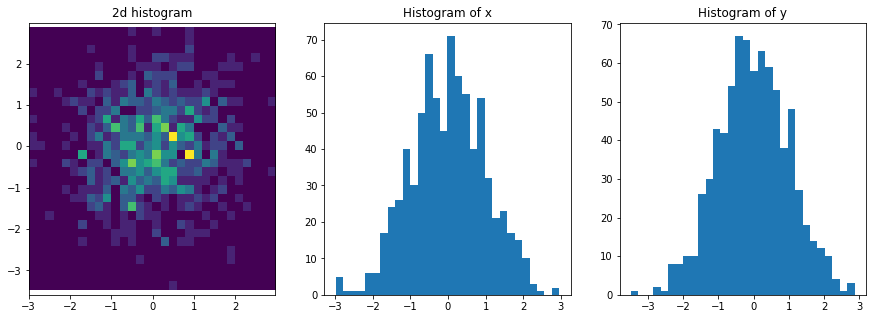

In [2]:
#Если U, V – независимые случайные величины, равномерно распределенные на [0, 1], то тогда 
#(X, Y) – гауссовский вектор N(0, I2), где 
#X = (-2logU)^0.5 cos(2pi*V) = Rcos(Q)
#Y = (-2logU)^0.5 sin(2pi*V) = Rsin(Q)
#Далее сводим к полярным координатам и преобразовываем плотности.
#R = (-2logU)^0.5 имеет функцию распределения 1 – e^(-x^2/2),
#так как P(R <= x) = P((-2logU)^0.5 <= x) = P(U >= e^(-x^2/2)) = 1 - P(U < e^(-x^2/2)).
#Q = 2pi*V равномерно распределена на [0, 2pi]. И они также независимы.
#Поэтому их совокупная плотность равна (1/(2pi))*x*e^(-x^2/2).
#Преобразование плотностей через f(R, Q) = (Rcos(Q), Rsin(Q)) = (X, Y):
#Якобиан при преобразовании (r, q) в (rcos(q), rsin(q)) = (t, s) равен r = (t^2 + s^2)^0.5.
#Таким образом плотность (X, Y) равна 1/(2pi) e^(-(t^2 + s^2)/2), поэтому X, Y имеют нормальное распределение N(0,1).

n = 1000
u1, u2 = (np.random.rand(2, n)-0.5)*2
s = u1**2+u2**2
x=[]
y=[]
for i in range(1000):
    if (s[i]!=0) and (s[i]<1):
        x.append(u1[i] * np.sqrt(-2*np.log(s[i])/s[i]))
        y.append(u2[i] * np.sqrt(-2*np.log(s[i])/s[i]))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

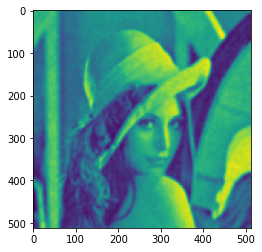

In [3]:
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma = 3)
median_lena = ndimage.median_filter(blurred_lena, size = 5)
wiener_lena = signal.wiener(blurred_lena, (5, 5))
plt.imshow(blurred_lena)
plt.show()

In [4]:
noisy_lena

array([[ 0.6271959 ,  0.50961631,  0.51675378, ...,  0.69672152,
         0.45621633,  0.3815242 ],
       [ 0.66845338,  0.74245006,  0.53802066, ...,  0.73599471,
         0.54688601,  0.40600123],
       [ 0.74312294,  0.43319113,  0.66562896, ...,  0.6207318 ,
         0.44506782,  0.42700688],
       ...,
       [ 0.08492621,  0.18577885, -0.0874978 , ...,  0.41579263,
         0.44681979,  0.42663641],
       [ 0.07110782,  0.13441856,  0.27133262, ...,  0.24850364,
         0.38745143,  0.34607608],
       [ 0.3121956 ,  0.09824395,  0.29092386, ...,  0.12059052,
         0.19805396,  0.31366272]])

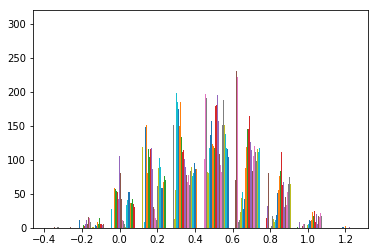

In [5]:
plt.figure()
plt.hist(noisy_lena)
plt.show()

In [6]:
noisy_lena.reshape(-1)

array([0.6271959 , 0.50961631, 0.51675378, ..., 0.12059052, 0.19805396,
       0.31366272])

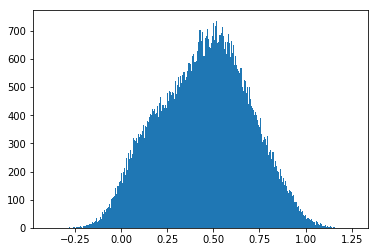

In [7]:
#гистограммы без различных цветов, которые возникали из-за формы массива, которым представлены изображения

plt.figure()
plt.hist(noisy_lena.reshape(-1), bins = 1000)
plt.show()

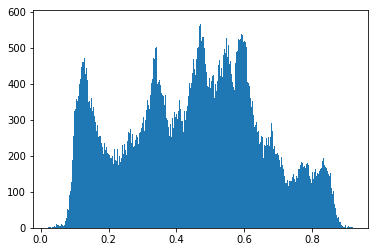

In [8]:
plt.figure()
plt.hist(blurred_lena.reshape(-1), bins = 1000)
plt.show()

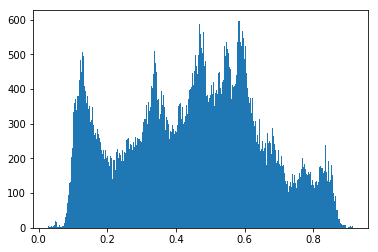

In [9]:
plt.figure()
plt.hist(median_lena.reshape(-1), bins = 1000)
plt.show()

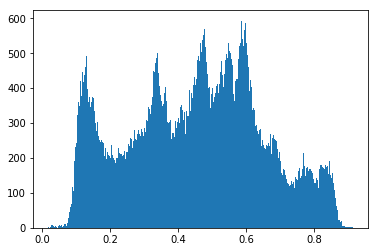

In [10]:
plt.figure()
plt.hist(wiener_lena.reshape(-1), bins = 1000)
plt.show()